### TODO
- Pull requirements from mlflow and install to notebook
- QC
- MBIP ; CMBIP ()()

In [0]:
%pip install seaborn==0.11.0
%pip install matplotlib>=3.2.0
%pip install h2o==3.36.0.4
%pip install mlflow==1.24.0
%pip install jenkspy
%pip install /dbfs/FileStore/jars/82a8f80e_8266_43fb_be3c_12ac7a64dc2d/maas_utils-0.2.0-py3-none-any.whl
%pip install h2o-pysparkling-3.2==3.36.0.4.post1

Python interpreter will be restarted.
Collecting seaborn==0.11.0
 Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
Requirement already satisfied: matplotlib>=2.2 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.0) (3.4.2)
Requirement already satisfied: scipy>=1.0 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.0) (1.6.2)
Requirement already satisfied: numpy>=1.15 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.0) (1.20.1)
Requirement already satisfied: pandas>=0.23 in /databricks/python3/lib/python3.8/site-packages (from seaborn==0.11.0) (1.2.4)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.0) (2.8.1)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.0) (8.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.0) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.0) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn==0.11.0) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib>=2.2->seaborn==0.11.0) (1.15.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.23->seaborn==0.11.0) (2020.5)
Installing collected packages: seaborn
 Attempting uninstall: seaborn
 Found existing installation: seaborn 0.11.1
 Not uninstalling seaborn at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-2d668070-39b4-42a5-8979-79c3c7401147
 Can't uninstall 'seaborn'. No files were found to uninstall.
Successfully installed seaborn-0.11.0
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting h2o==3.36.0.4
 Using cached h2o-3.36.0.4-py2.py3-none-any.whl
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from h2o==3.36.0.4) (2.25.1)
Requirement already satisfied: future in /databricks/python3/lib/python3.8/site-packages (from h2o==3.36.0.4) (0.18.2)
Requirement already satisfied: tabulate in /databricks/python3/lib/python3.8/site-packages (from h2o==3.36.0.4) (0.8.7)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.36.0.4) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.36.0.4) (2.10)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.36.0.4) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->h2o==3.36.0.4) (4.0.0)
Installing collected packages: h2o
Successfully installed h2o-3.36.0.4
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting mlflow==1.24.0
 Using cached mlflow-1.24.0-py3-none-any.whl (16.5 MB)
Requirement already satisfied: databricks-cli>=0.8.7 in /databricks/python3/lib/python3.8/site-packages (from mlflow==1.24.0) (0.16.3)
Requirement already satisfied: gunicorn in /databricks/python3/lib/python3.8/site-packages (from mlflow==1.24.0) (20.0.4)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow==1.24.0) (2020.5)
Collecting alembic
 Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from mlflow==1.24.0) (1.6.2)
Requirement alread

In [0]:
from mass_utils import pyspark_helpers as pysh
from mass_utils import databricks_helpers as dbh
# https://adb-5279176415892020.0.azuredatabricks.net/?o=5279176415892020#notebook/461130007466550/command/461130007466588
import mlflow
from mlflow.tracking import MlflowClient

import h2o
import pandas as pd
import numpy as np
import pprint
from pyspark.sql.functions import regexp_replace, col, lower, when, rand, lit
import math
import json
import ast

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import os
import os.path

def round_nearest(x,cutoff=1000000):
  '''Round to 0 or nearest 10K or nearest 100K based on cutoff'''
  def round_nearest_multiple(number,multiple):
    '''Returns a float rounded to the nearest multiple'''
    return round(float(number)/multiple)*multiple
  def round_up_nearest_multiple(number,multiple):
    '''Returns a float rounded up to nearest multiple'''
    return math.ceil(float(number)/multiple)*multiple
  
  if x <= 5000:
    return 0
  elif x < cutoff:
    return round_nearest_multiple(x,10000) # round to nearest 10K
  elif x >= cutoff:
    return round_nearest_multiple(x,100000) # round to nearest 100K

  
def round_up_nearest(x,round_nearest_cutoff=100000,cutoff=1000000):
  '''Round to 0 or nearest 10K or nearest 100K based on cutoff'''
  def round_nearest_multiple(number,multiple):
    '''Returns a float rounded to the nearest multiple'''
    return round(float(number)/multiple)*multiple
  def round_up_nearest_multiple(number,multiple):
    '''Returns a float rounded up to nearest multiple'''
    return math.ceil(float(number)/multiple)*multiple
  
  if int(x) <= 5000:
    return 0
  elif int(x) < round_nearest_cutoff:
    return round_nearest_multiple(x,10000) # round to nearest 10K
  elif int(x) < cutoff:
    return round_up_nearest_multiple(x,10000) # round up to nearest 10K
  elif int(x) >= cutoff:
    return round_up_nearest_multiple(x,100000) # round to nearest 100K

In [0]:
# dbutils.widgets.remove('population')

In [0]:
dbutils.widgets.text('training_experiment_path', 'experiment_path')
dbutils.widgets.text('scoring_experiment_path', 'experiment_path')
# dbutils.widgets.text('population', 'current customer')
dbutils.widgets.text('scoring_preprocessed_dataset', 'dataset')
dbutils.widgets.text('scoring_raw_dataset', 'raw_dataset')
dbutils.widgets.text('scoring_date','2022-07-31')


In [0]:
train_exp_path = getArgument('training_experiment_path')
score_exp_path = getArgument('scoring_experiment_path')
pop = 'Current Customer'
score_data = getArgument('scoring_preprocessed_dataset')
raw_score_data = getArgument('scoring_raw_dataset')
scoring_date = getArgument('scoring_date')


print("Train Experiment Path = ", train_exp_path)
print("Scoring Experiment Path = ", score_exp_path)
print("Population = ", pop)
print("Score data table name = ", score_data)
print("Raw Score data table name = ", raw_score_data)
print("Scoring Date = ", scoring_date)

Train Experiment Path = /MDA/MODELING_DEV/segmentation/PROD/SEGMENTATION_MODELS
Scoring Experiment Path = /MDA/MODELING_DEV/segmentation/PROD/SEGMENTATION_SCORES
Population = Current Customer
Score data table name = seg_curr_cust_preprocessed_dataset_test
Raw Score data table name = seg_curr_cust_raw_dataset_test
Scoring Date = 2022-07-31

In [0]:
try:
  spark.sql('refresh table ' + score_data)
except Exception as e:
  error = 'Problem with dataset: ' + score_data
  dbutils.notebook.exit(error)
  
try:
  spark.sql('refresh table ' + raw_score_data)
except Exception as e:
  error = 'Problem with dataset: ' + raw_score_data
  dbutils.notebook.exit(error)
  

In [0]:
client = MlflowClient()

train_exp = mlflow.get_experiment_by_name(train_exp_path)
train_exp_id = train_exp.experiment_id

display(client.list_run_infos(train_exp_id))

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-1479463378134623> in <module> 
 2 
 3 train_exp = mlflow . get_experiment_by_name ( train_exp_path ) 
 ----> 4 train_exp_id = train_exp . experiment_id
 5 
 6 display ( client . list_run_infos ( train_exp_id ) ) 

 AttributeError : 'NoneType' object has no attribute 'experiment_id'

In [0]:
mlflow_query = "tags.active = 1 and tags.account_population = '" + pop + "'"
active_run = client.search_runs(experiment_ids=train_exp_id, filter_string=mlflow_query)[0].to_dictionary()
artifact_uri = active_run['info']['artifact_uri'] + '/'
run_id = active_run['info']['run_id']

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1479463378134624> in <module> 
 1 mlflow_query = "tags.active = 1 and tags.account_population = '" + pop + "'" 
 ----> 2 active_run = client . search_runs ( experiment_ids = train_exp_id , filter_string = mlflow_query ) [ 0 ] . to_dictionary ( ) 
 3 artifact_uri = active_run [ 'info' ] [ 'artifact_uri' ] + '/' 
 4 run_id = active_run [ 'info' ] [ 'run_id' ] 

 NameError : name 'train_exp_id' is not defined

In [0]:
artifact_objects = client.list_artifacts(run_id)
artifacts_paths = {}
for item in artifact_objects:
  if 'dataset' in item.path:
    artifacts_paths['train_dataset'] = item.path
  if 'model_python' in item.path:
    artifacts_paths['model_path'] = item.path
  if 'features_only' in item.path:
    artifacts_paths['features'] = item.path
  if 'reqs' in item.path:
    artifacts_paths['requirements'] = item.path
  if 'metrics_per_train' in item.path:
    artifacts_paths['train_day_metrics'] = item.path
    
artifacts_paths 

Out[8]: {'model_path': 'GBM_model_python_1650371546612_210',
 'features': 'features_only_list.txt',
 'train_day_metrics': 'metrics_per_train_day.json',
 'requirements': 'reqs.txt',
 'train_dataset': 'training_dataset.csv'}

In [0]:
h2o.init()
saved_model = mlflow.h2o.load_model(artifact_uri + artifacts_paths['model_path'])

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
-------------------------- -----------------------------
H2O_cluster_uptime: 2 hours 13 mins
H2O_cluster_timezone: Etc/UTC
H2O_data_parsing_timezone: UTC
H2O_cluster_version: 3.36.0.4
H2O_cluster_version_age: 20 days
H2O_cluster_name: H2O_from_python_root_cdqtrv
H2O_cluster_total_nodes: 1
H2O_cluster_free_memory: 10.46 Gb
H2O_cluster_total_cores: 15
H2O_cluster_allowed_cores: 15
H2O_cluster_status: locked, healthy
H2O_connection_url: http://localhost:54321
H2O_connection_proxy: {"http": null, "https": null}
H2O_internal_security: False
Python_version: 3.8.10 final
-------------------------- -----------------------------

In [0]:
# Download training dataset artifact
local_dir = "/tmp/artifact_downloads/segmentation/current_customer"
if not os.path.exists(local_dir):
    os.makedirs(local_dir)
local_path = client.download_artifacts(run_id, artifacts_paths['train_dataset'], local_dir)
print("Artifacts downloaded in: {}".format(local_dir))
print("Artifacts: {}".format(os.listdir(local_dir)))

# get training dataset and convert to pandas
original_training_df_pd = pd.read_csv(local_dir+'/'+artifacts_paths['train_dataset'])

# get scoring dataset
scoring_df = spark.sql('select * from ' + score_data + ' where calendar_date in ("' + scoring_date + '")')
scoring_df = scoring_df.withColumn('rand_number', rand())

# dv = 'dv'
# scoring_df = scoring_df.withColumnRenamed(a_run['data']['tags'][dv], dv)

scoring_df_pd = scoring_df.toPandas()


--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1479463378134627> in <module> 
 3 if not os . path . exists ( local_dir ) : 
 4 os . makedirs ( local_dir ) 
 ----> 5 local_path = client . download_artifacts ( run_id , artifacts_paths [ 'train_dataset' ] , local_dir ) 
 6 print ( "Artifacts downloaded in: {}" . format ( local_dir ) ) 
 7 print ( "Artifacts: {}" . format ( os . listdir ( local_dir ) ) ) 

 NameError : name 'run_id' is not defined

### Score + Adjust Predictions

In [0]:
### Grab features 
local_path = client.download_artifacts(run_id, artifacts_paths['features'], local_dir)
print("Artifacts downloaded in: {}".format(local_dir))
print("Artifacts: {}".format(os.listdir(local_dir)))

features_txt = open(local_path, "r").read()
features_only = features_txt.replace('"','').replace("[","").replace("]","").replace("'","").split(", ")

all_features = features_only + ['account_id','calendar_date']

print("Features: ", features_only)

Artifacts downloaded in: /tmp/artifact_downloads/segmentation/current_customer
Artifacts: ['training_dataset.csv', 'metrics_per_train_day.json', 'features_only_list.txt']
Features: ['fiscal_qtr_code_q3', 'days_since_last_eng', 'last_5years_total_spend_forecast_group_traffic_management', 'num_person', 'fiscal_qtr_code_q2', 'fiscal_qtr_code_q1', 'last_6months_avg_booking_amount', 'last_5years_total_qty_forecast_group_viprion', 'last_3years_avg_booking_amount', 'digital_engagement_per_person', 'last_3years_total_spend_forecast_group_subsc_ve_ngx_pls', 'leads_persona_level_total_past_12mo_individual_contributor', 'tech_leads_ratio', 'q1_closed_opp_percentage', 'total_spend_forecast_group_subsc_ela_ve', 'last_year_total_spend_forecast_group_traffic_management', 'last_year_booking_amount', 'total_apm_sr_product_family', 'days_since_last_opened_sr', 'leads_persona_level_total_past_6mo_individual_contributor', 'last_3_month_num_engagement', 'days_since_latest_ela_purchase', 'fiscal_qtr_code_q4', 'total_spend_brand_big_ip', 'last_3months_digital_engagements_count_per_person', 'q4_closed_opp_percentage', 'total_spend_business_unit_service', 'last_6_month_gtm_campaign_nginx', 'leads_persona_function_past_3mo_ceo_cmo_cto_cxo', 'leads_persona_level_total_past_12mo_c_level_executive', 'mid_rank_leads_ratio', 'last_3years_total_spend_forecast_group_traffic_management', 'pct_leads_persona_level_total_past_12mo_sr__manager_manager', 'total_spend_full_product_type_hardware_field_upgrade', 'revenue_segment_mid_market', 'pct_leads_persona_function_past_12mo_information_security', 'leads_persona_level_total_past_12mo_svp_vp', 'num_leads', 'engagements_per_lead_ratio', 'last_5years_avg_booking_amount', 'last_3months_mktg_success_dates', 'total_programmability_sr_family', 'q2_closed_opp_percentage', 'total_mktg_success_dates', 'site_employee_count', 'last_5years_total_qty_forecast_group_big_iq', 'digital_engagements_count', 'last_6_month_num_engagement', 'revenue_segment_large_enterprise', 'total_biq_sr_product_family', 'total_spend_product_family_traffic_management', 'total_asm_sr_product_family', 'days_since_last_purchase', 'revenue_segment_government', 'revenue_segment_smb', 'netops_leads_ratio', 'q3_closed_opp_percentage', 'web_visits', 'count_engagements', 'last_year_total_qty_forecast_group_big_iq', 'last_3_month_gtm_campaign_nginx', 'last_5years_total_qty_forecast_group_traffic_management', 'last_3months_web_visits', 'lifetime_ela_total_price_amt', 'total_ltm_sr_product_family']

In [0]:
### Add 0 columns for any missing qtr dummy features
#missing_qtr_ftrs = [col for col in set(features_only) - set(scoring_df_pd.columns) if 'fiscal_qtr' in col]
#for col in missing_qtr_ftrs:
#  scoring_df_pd[col] = 0
  

In [0]:
# create h2o dfs

x_score_h2o = h2o.H2OFrame(scoring_df_pd[all_features])
scoring_df_pd['acct_index'] = scoring_df_pd.index

if 'calendar_date_str' in features_only:
  x_score_h2o['calendar_date_str'] = x_score_h2o['calendar_date_str'].asfactor()

# predict and merge results to dataframe
pred_hex_df = saved_model.predict(x_score_h2o)
pred_df = pred_hex_df.as_data_frame()
results_df_pd = scoring_df_pd.merge(pred_df, left_index=True, right_index=True)

# round and adjust original prediction
results_df_pd['rounded_predict'] = results_df_pd['predict'].apply(round_nearest)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

### Prediction Adjustments

> Calculate training errors

In [0]:
#matching_qtr = [col for col in original_training_df_pd if 'code' in col and scoring_df_pd.fiscal_qtr_code.max().lower() in col][0]
#training_df_pd = original_training_df_pd[original_training_df_pd[matching_qtr] == 1]
training_df_pd = original_training_df_pd.copy()

In [0]:
training_df_pd['residual'] = training_df_pd['dv'] - training_df_pd['predict']
training_df_pd['abs_residual'] = abs(training_df_pd['dv'] - training_df_pd['predict'])

training_df_pd['pred_err_ratio'] = np.where(training_df_pd['dv']>0, training_df_pd['abs_residual'] / training_df_pd['predict'], np.nan)
training_df_pd['dv_err_ratio'] = np.where(training_df_pd['dv']>0, training_df_pd['abs_residual'] / training_df_pd['dv'], np.nan)

In [0]:
# add in quantile bins
# q_bins = [0,0.75,0.9,0.98,1]
q_bins = [0,0.85,0.9,0.95,1]

train_quantiles_df = training_df_pd[['dv','predict','residual','abs_residual','pred_err_ratio','dv_err_ratio']].quantile(q_bins).reset_index()
q_bins_spend = train_quantiles_df.dv.tolist()
predict_q_bins_spend = train_quantiles_df.predict.tolist()

display(train_quantiles_df)

index,dv,predict,residual,abs_residual,pred_err_ratio,dv_err_ratio
0.0,0.0,81.69201972286142,-5533284.06865106,0.8035599335257757,2.7964898388660236E-4,2.795708021958439E-4
0.85,2299.92,24947.68037891111,-269.3162061206831,46912.954581580605,109.95341171721421,0.999611462329324
0.9,26544.405,39881.83806259568,16845.36429949201,80833.39904431018,193.4616812642077,2.8787038591007135
0.95,100875.88,82457.16112547435,88771.4784120468,179921.06938966573,416.13818705228636,13.182231893637303
1.0,3.165928559E7,5533284.06865106,3.1655440522588857E7,3.1655440522588857E7,40422.04505547455,2.5158861566012517E7


In [0]:
q_bins_spend[-1] = float('inf')
q_bins_spend[0] = float('-inf')
predict_q_bins_spend[-1] = float('inf')
predict_q_bins_spend[0] = float('-inf')


q_labels = [str(a) + ' to ' + str(b) for a, b in zip(q_bins,q_bins[1:])]
pprint.pprint({q_bins[i]: predict_q_bins_spend[i] for i in range(len(q_bins))})
pprint.pprint({q_bins[i]: q_bins_spend[i] for i in range(len(q_bins))})

training_df_pd['quantile_predict_spend_bins'] = pd.cut(x=training_df_pd.predict, right=True,include_lowest=True,bins=predict_q_bins_spend,labels=q_labels,duplicates='drop').astype(str)
training_df_pd['quantile_predict_spend_intervals'] = pd.cut(x=training_df_pd.predict, right=True,include_lowest=True,bins=predict_q_bins_spend,duplicates='drop').astype(str)

training_df_pd['quantile_spend_bins'] = pd.cut(x=training_df_pd.dv, right=True,include_lowest=True,bins=q_bins_spend,labels=q_labels,duplicates='drop').astype(str)
training_df_pd['quantile_spend_bins_intervals'] = pd.cut(x=training_df_pd.dv, right=True,include_lowest=True,bins=q_bins_spend,duplicates='drop').astype(str)



{0: -inf,
 0.85: 24947.68037891111,
 0.9: 39881.83806259568,
 0.95: 82457.16112547435,
 1: inf}
{0: -inf, 0.85: 2299.92, 0.9: 26544.405, 0.95: 100875.88, 1: inf}

In [0]:
underpredictors_msk = training_df_pd.predict < training_df_pd.dv 
training_df_pd[underpredictors_msk].groupby('quantile_spend_bins')['pred_err_ratio'].mean().to_dict()

Out[18]: {'0 to 0.85': 1.4997893587393587,
 '0.85 to 0.9': 11.402825203863712,
 '0.9 to 0.95': 40.535874530407575,
 '0.95 to 1': 332.05914093053605}

In [0]:
training_df_pd.groupby('quantile_spend_bins')['dv_err_ratio'].mean().to_dict()

Out[19]: {'0 to 0.85': 20111.757976214398,
 '0.85 to 0.9': 2.9708892805465004,
 '0.9 to 0.95': 1.0127549650556786,
 '0.95 to 1': 0.9479511481769507}

In [0]:
training_df_pd.groupby('quantile_spend_bins')['pred_err_ratio'].median().to_dict()

Out[20]: {'0 to 0.85': 0.9195578233966067,
 '0.85 to 0.9': 1.7609597250566382,
 '0.9 to 0.95': 12.707275153821714,
 '0.95 to 1': 66.48024910983027}

In [0]:
training_df_pd[underpredictors_msk].groupby('quantile_spend_bins')['pred_err_ratio'].median().to_dict()

Out[21]: {'0 to 0.85': 0.8334465823292999,
 '0.85 to 0.9': 4.6514576480655965,
 '0.9 to 0.95': 15.6673109700036,
 '0.95 to 1': 68.9330765142798}

In [0]:
training_df_pd[underpredictors_msk].groupby('quantile_spend_bins')['dv_err_ratio'].median().to_dict()

Out[22]: {'0 to 0.85': 0.4545791463803918,
 '0.85 to 0.9': 0.8230544998700849,
 '0.9 to 0.95': 0.940002319402349,
 '0.95 to 1': 0.985700614458346}

In [0]:
training_df_pd[underpredictors_msk].groupby('quantile_spend_bins')['dv_err_ratio'].mean().to_dict()

Out[23]: {'0 to 0.85': 0.4521414219864407,
 '0.85 to 0.9': 0.7247869099968527,
 '0.9 to 0.95': 0.8574410230570306,
 '0.95 to 1': 0.941499021760005}

In [0]:
# get dv err ratio % errors per quantile bins
underpredictors_msk = training_df_pd.predict < training_df_pd.dv 
bin_avg_pct_errors = training_df_pd[underpredictors_msk].groupby('quantile_spend_bins')['dv_err_ratio'].median().to_dict()
bin_avg_pct_errors

# get max and min key in prediction error ratio dictionary and adjust constants dict
pred_bin_avg_pct_errors = training_df_pd.groupby('quantile_spend_bins')['pred_err_ratio'].median().to_dict()
max_key = max(pred_bin_avg_pct_errors,key=str)
min_key = min(pred_bin_avg_pct_errors,key=str)

# bin_avg_pct_errors[max_key] = pred_bin_avg_pct_errors[max_key] #higher adjustments for top quantile
bin_avg_pct_errors[min_key] = 0 #no adjustments for bottom quantile


pprint.pprint(bin_avg_pct_errors)


bin_avg_pct_errors_file = '/dbfs/FileStore/seg_current_cust_train_pct_error_mapping.json'
with open(bin_avg_pct_errors_file, 'w') as outfile: 
  json.dump(bin_avg_pct_errors, outfile)


{'0 to 0.85': 0,
 '0.85 to 0.9': 0.8230544998700849,
 '0.9 to 0.95': 0.940002319402349,
 '0.95 to 1': 0.985700614458346}

Out[25]:

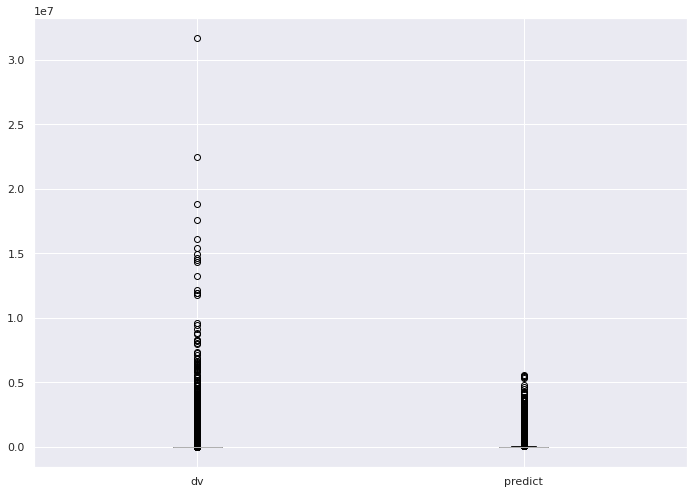

<AxesSubplot:>

In [0]:
training_df_pd.boxplot(column=['dv','predict'])

Out[26]:

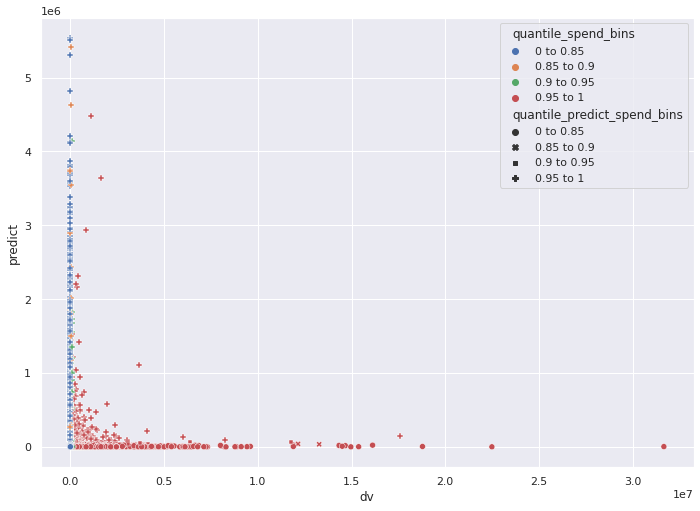

<AxesSubplot:xlabel='dv', ylabel='predict'>

In [0]:
sns.scatterplot(data=training_df_pd, x="dv", y="predict", hue="quantile_spend_bins",hue_order=sorted(list(training_df_pd.quantile_spend_bins.unique())), style="quantile_predict_spend_bins", style_order = sorted(list(training_df_pd.quantile_predict_spend_bins.unique())))



> Apply constant to predictions

In [0]:
# add in quantile bins
score_quantiles_df = results_df_pd[['predict']].quantile(q_bins).reset_index()
q_bins_predicted_spend = score_quantiles_df.predict.tolist()
predict_q_bins_spend = score_quantiles_df.predict.tolist()

predict_q_bins_spend[-1] = float('inf')
predict_q_bins_spend[0] = float('-inf')
q_labels = [str(a) + ' to ' + str(b) for a, b in zip(q_bins,q_bins[1:])]
pprint.pprint({q_bins[i]: predict_q_bins_spend[i] for i in range(len(q_bins))})

results_df_pd['quantile_predict_spend_bins'] = pd.cut(x=results_df_pd.predict, right=True,include_lowest=True,bins=predict_q_bins_spend,labels=q_labels).astype(str)
results_df_pd['quantile_predict_spend_intervals'] = pd.cut(x=results_df_pd.predict, right=True,include_lowest=True,bins=predict_q_bins_spend).astype(str)


{0: -inf,
 0.85: 38567.92076370597,
 0.9: 56467.47325112309,
 0.95: 118861.82151841048,
 1: inf}

In [0]:
results_df_pd['train_error_pct'] = results_df_pd['quantile_predict_spend_bins'].apply(lambda x: bin_avg_pct_errors[x])
results_df_pd['constant'] = results_df_pd['predict'] * results_df_pd['train_error_pct']

bins=[float('-inf'),5000,10000,100000,500000,1000000, float('inf')]
alphabet = [chr(i) for i in range(ord('a'),ord('z')+1)]
bin_labels=[str(c) + '. ' + str(a) + ' to ' + str(b) for a, b,c in zip(bins,bins[1:], alphabet)]
results_df_pd['predict_plus_constant'] = results_df_pd['predict'] + results_df_pd['constant']
results_df_pd['rounded_predict_plus_constant'] = results_df_pd['predict_plus_constant'].apply(round_up_nearest)
results_df_pd['rounded_last_3years_avg_piacv_amount'] = results_df_pd['last_3years_avg_piacv_amount'].apply(round_nearest)
results_df_pd['predict_less_than_3yr_avg'] = results_df_pd['rounded_predict_plus_constant'] < results_df_pd['rounded_last_3years_avg_piacv_amount']
results_df_pd['rounded_predict_plus_constant_or_3yr_average'] = np.where(results_df_pd['predict_less_than_3yr_avg']==True, results_df_pd['rounded_last_3years_avg_piacv_amount'], results_df_pd['rounded_predict_plus_constant'])

results_df_pd['rounded_predict_plus_constant_or_3yr_average_spend_bins']=pd.cut(x=results_df_pd.rounded_predict_plus_constant_or_3yr_average, right=True,include_lowest=True, bins=bins,labels=bin_labels).astype(str)


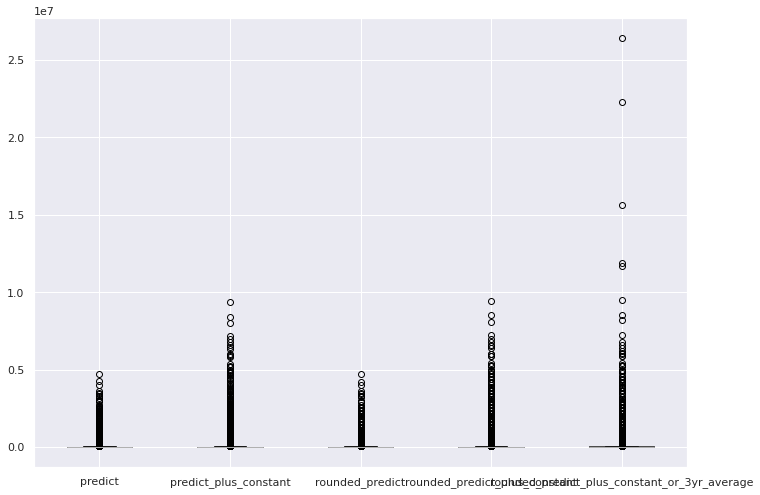

In [0]:
box_fig = results_df_pd.boxplot(column=['predict','predict_plus_constant', 'rounded_predict','rounded_predict_plus_constant','rounded_predict_plus_constant_or_3yr_average'])

box_fig_file = '/dbfs/FileStore/seg_current_cust_prediction_boxplot.png'
box_fig.figure.savefig(box_fig_file)

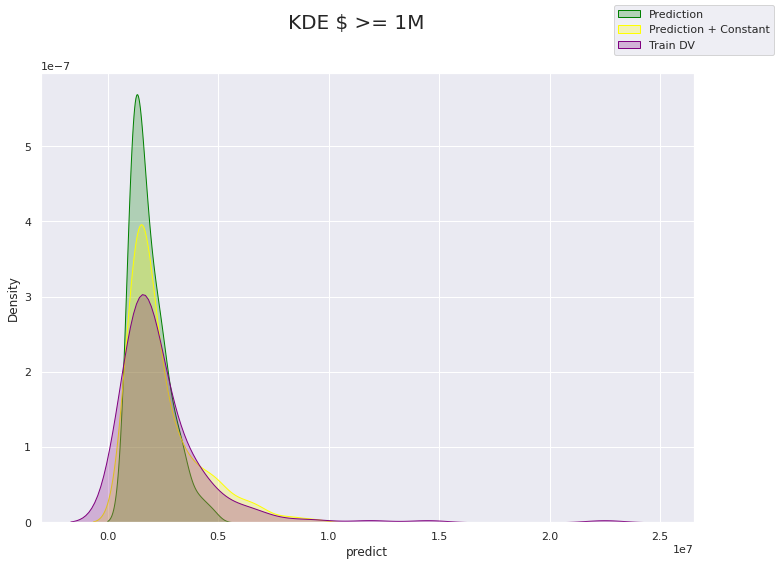

In [0]:

ax = sns.kdeplot(data=results_df_pd[results_df_pd['predict']>=1000000], x='predict', thresh=0.05, color='green',fill=True, common_grid=True, legend=True)

ax = sns.kdeplot(data=results_df_pd[results_df_pd['predict_plus_constant']>=1000000], x='predict_plus_constant', thresh=0.05, color='yellow',fill=True, common_grid=True, legend=True)

ax = sns.kdeplot(data=training_df_pd[(training_df_pd['dv']>=1000000) ], x='dv', thresh=0.05, color='purple',fill=True, common_grid=True, legend=True)

ax.figure.legend(labels=['Prediction','Prediction + Constant','Train DV'])
ax.figure.suptitle('KDE $ >= 1M', fontsize=20)

kde_mill_plus_file = '/dbfs/FileStore/seg_current_cust_kde_spend_million_or_more.png'
ax.figure.savefig(kde_mill_plus_file)

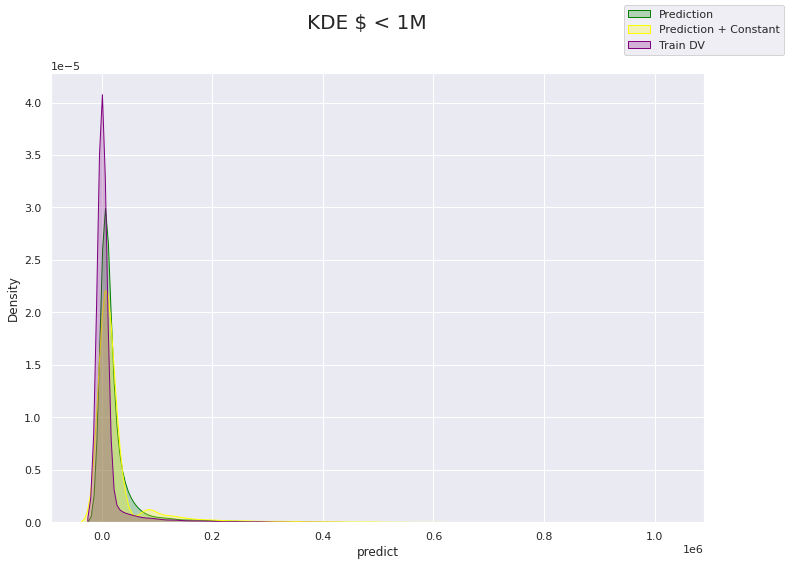

In [0]:

ax = sns.kdeplot(data=results_df_pd[results_df_pd['predict']<1000000], x='predict', thresh=0.05, color='green',fill=True, common_grid=True, legend=True)

ax = sns.kdeplot(data=results_df_pd[results_df_pd['predict_plus_constant']<1000000], x='predict_plus_constant', thresh=0.05, color='yellow',fill=True, common_grid=True, legend=True)

ax = sns.kdeplot(data=training_df_pd[(training_df_pd['dv']<1000000) ], x='dv', thresh=0.05, color='purple',fill=True, common_grid=True, legend=True)

ax.figure.legend(labels=['Prediction','Prediction + Constant','Train DV'])
ax.figure.suptitle('KDE $ < 1M', fontsize=20)

kde_less_than_mill_file = '/dbfs/FileStore/seg_current_cust_kde_spend_less_than_million.png'
ax.figure.savefig(kde_less_than_mill_file)

### Growth Indicator

In [0]:
# curate a definitoin of last 3 years spend for growth indicator calculation
young_acct_mask = (results_df_pd['months_since_first_product_purchase'] < 36) & (results_df_pd['last_3years_piacv_amount'] > 0)
inactive_acct_mask = (results_df_pd['last_3years_piacv_amount'] <= 0) & (results_df_pd['lifetime_piacv_amount'] > 0)
no_past_spend_mask = (results_df_pd['last_3years_piacv_amount'] <= 0) & (results_df_pd['lifetime_piacv_amount'] <= 0)

# last_3years_piacv_amount field comes from EXP_MKTG.DATA_SCIENCE.CALENDAR_DATASET
results_df_pd['growth_last_3years_avg_piacv_amount'] = np.where(young_acct_mask, (results_df_pd['last_3years_piacv_amount'] / (results_df_pd['months_since_first_product_purchase']/12))
                                                            , np.where(inactive_acct_mask, (results_df_pd['lifetime_piacv_amount'] / (results_df_pd['months_since_first_product_purchase']/12))
                                                            , np.where(no_past_spend_mask, 0, results_df_pd['last_3years_avg_piacv_amount'])))

# Definition of growth; 1 = delta btwn prediction & last 3years average is > 5%
will_grow_mask = ((results_df_pd['rounded_predict_plus_constant_or_3yr_average'] - results_df_pd['growth_last_3years_avg_piacv_amount']) / results_df_pd['growth_last_3years_avg_piacv_amount']) > 0.05


# create growth indicator and buying group based off of growth definition
results_df_pd['next_year_growth_ind'] = np.where(will_grow_mask, 1, 0)
results_df_pd['buying_group_code'] = np.where(will_grow_mask, 'Expand', 'Retain')



In [0]:
# lst = ['sfdcf5_acct_id','predict','next_year_piacv_prediction_amt','growth_last_3years_avg_piacv_amount','last_3years_avg_booking_amount','last_3years_avg_piacv_amount']
# display(results_df_pd[(results_df_pd['sfdcf5_acct_id']=='00100000000wxtXAAQ')][lst])

In [0]:
a = spark.createDataFrame(results_df_pd)
a.createOrReplaceTempView("tmp")

b = spark.createDataFrame(training_df_pd)
b.createOrReplaceTempView("train_tmp")



In [0]:
%sql
select tmp.account_name
, tmp.account_id
, max(tmp.growth_last_3years_avg_piacv_amount) growth_last_3years_avg_piacv_amount
, max(train_tmp.dv) max_dv
, min(train_tmp.dv) min_dv
, mean(train_tmp.dv) mean_dv
, max(tmp.predict) predict
, max(tmp.rounded_predict_plus_constant) rounded_predict_plus_constant
, max(tmp.train_error_pct) train_error_pct
, max(tmp.months_since_first_product_purchase) months_since_first_product_purchase
, max(tmp.last_3years_piacv_amount) last_3years_piacv_amount
, max(tmp.lifetime_piacv_amount) lifetime_piacv_amount
from tmp 
inner join train_tmp
on tmp.account_id = train_tmp.account_id
-- where tmp.account_id = '0015000000ScHavAAF'
group by tmp.account_name, tmp.account_id
order by int(rounded_predict_plus_constant) desc
-- order by int(dv) desc

account_name,account_id,growth_last_3years_avg_piacv_amount,max_dv,min_dv,mean_dv,predict,rounded_predict_plus_constant,train_error_pct,months_since_first_product_purchase,last_3years_piacv_amount,lifetime_piacv_amount
Microsoft Corporation,00100000000ujymAAA,2.644281885333333E7,3.165928559E7,9110868.06,2.1084865483333334E7,4716188.58919483,9400000,0.985700614458346,171.0,7.932845656E7,3.2172854863E8
Oracle Corporation,00100000000ukYNAAY,3705877.48666667,2403403.83,2403403.83,2403403.83,4232478.266435346,8500000,0.985700614458346,171.0,1.111763246E7,8.272428951E7
Verizon Communications,00100000000wxtXAAQ,1.167914072E7,1.758996532E7,6159712.97,1.3145488275E7,4033460.5730687953,8100000,0.985700614458346,171.0,3.503742216E7,1.6881909797E8
Defense Information Systems Agency 1,00100000000unK3AAI,5606395.98666667,6372265.64,3187721.17,4545684.7299999995,3618039.975149029,7200000,0.985700614458346,171.0,1.681918796E7,9.000459917E7
JPMorgan Chase & Co. HEADQUARTERS,00100000001l35yAAA,1.560136775E7,8243591.26,1090085.28,4666838.27,3513996.4252875284,7000000,0.985700614458346,169.0,4.680410325E7,1.0026082544E8
AT&T Inc.,0015000000Q88ZSAAZ,6175402.34333333,4356298.41,2445895.31,3320640.6975000002,3416008.0207020277,6800000,0.985700614458346,164.0,1.852620703E7,1.001124178E8
"Comcast Cable Communications, LLC",0015000000ouvyKAAQ,6145203.70333333,8858174.69,4918628.97,6606747.896666666,3313680.0673858994,6600000,0.985700614458346,90.0,1.843561111E7,4.858098591E7
Salesforce.com - HQ,00100000000ukafAAA,1.187127061333333E7,1.878235042E7,3404809.14,1.2768896973333335E7,3263334.7086234693,6500000,0.985700614458346,169.0,3.561381184E7,6.740441689E7
Telstra Corporation Limited,00100000001VRC2AAO,2452123.05666667,2777341.67,1761803.49,2396957.2,3177034.015064496,6400000,0.985700614458346,171.0,7356369.17,5.666629068E7
KDDI株式会社,0015000000PGmx0AAD,2677938.45333333,3797435.11,3571915.97,3684675.54,2996442.506770439,6000000,0.985700614458346,160.0,8033815.36,4.757492234E7


In [0]:
# dbutils.notebook.exit('exiting')

### (Raw) Features + Predictions Summary

In [0]:
# handle dummy features in processed dataset that aren't in the raw dataset
categorical_ftrs = ['theater','revenue_segment','fiscal_qtr_code']

encoded_ftrs = [col for col in features_only for cat_col in categorical_ftrs if cat_col in col]
raw_features_only = list(set(features_only) - set(encoded_ftrs)) + categorical_ftrs

In [0]:
# get raw scoring dataset
raw_scoring_df = spark.sql('select * from ' + raw_score_data + ' where calendar_date in ("' + scoring_date + '")')
raw_scoring_df = raw_scoring_df.withColumn('rand_number', rand())
raw_df_pd = raw_scoring_df.select(raw_features_only).toPandas()

raw_data_file = '/dbfs/FileStore/seg_current_cust_raw_data.csv'
raw_df_pd.to_csv(raw_data_file)

ftr_summary = raw_df_pd.describe(include='all').reset_index()

ftr_summary_file = '/dbfs/FileStore/seg_current_cust_raw_data_ftrs_summary.csv'
ftr_summary.to_csv(ftr_summary_file)

ftr_summary

Out[37]:

,index,days_since_last_eng,num_person,last_6months_avg_booking_amount,digital_engagement_per_person,last_3years_total_spend_forecast_group_subsc_ve_ngx_pls,last_year_total_spend_forecast_group_traffic_management,days_since_last_opened_sr,last_3_month_num_engagement,total_spend_full_product_type_hardware_field_upgrade,pct_leads_persona_function_past_12mo_information_security,leads_persona_level_total_past_12mo_svp_vp,num_leads,engagements_per_lead_ratio,last_5years_avg_booking_amount,last_3months_mktg_success_dates,total_mktg_success_dates,last_5years_total_qty_forecast_group_big_iq,digital_engagements_count,total_biq_sr_product_family,total_spend_product_family_traffic_management,total_asm_sr_product_family,days_since_last_purchase,web_visits,q4_closed_opp_percentage,count_engagements,last_3_month_gtm_campaign_nginx,total_spend_brand_big_ip,last_3months_web_visits,lifetime_ela_total_price_amt,total_ltm_sr_product_family,last_5years_total_spend_forecast_group_traffic_management,last_5years_total_qty_forecast_group_viprion,last_3years_avg_booking_amount,leads_persona_level_total_past_12mo_individual_contributor,tech_leads_ratio,q1_closed_opp_percentage,total_spend_forecast_group_subsc_ela_ve,last_year_booking_amount,total_apm_sr_product_family,leads_persona_level_total_past_6mo_individual_contributor,days_since_latest_ela_purchase,last_3months_digital_engagements_count_per_person,total_spend_business_unit_service,last_6_month_gtm_campaign_nginx,leads_persona_function_past_3mo_ceo_cmo_cto_cxo,leads_persona_level_total_past_12mo_c_level_executive,pct_leads_persona_level_total_past_12mo_sr__manager_manager,mid_rank_leads_ratio,last_3years_total_spend_forecast_group_traffic_management,q2_closed_opp_percentage,total_programmability_sr_family,site_employee_count,last_6_month_num_engagement,q3_closed_opp_percentage,netops_leads_ratio,last_year_total_qty_forecast_group_big_iq,last_5years_total_qty_forecast_group_traffic_management,theater,revenue_segment,fiscal_qtr_code
0,count,23922.000000,23864.000000,2.828400e+04,23864.000000,1.943800e+04,1.037400e+04,18851.000000,23436.000000,2.775700e+04,24581.000000,24581.000000,23922.000000,23919.000000,2.828400e+04,23922.000000,23922.000000,23252.000000,23864.000000,18851.000000,2.775700e+04,18851.000000,28284.000000,23864.000000,28284.000000,23922.000000,24520.000000,2.775700e+04,23864.000000,2.828400e+04,18851.000000,2.325200e+04,23252.000000,2.828400e+04,24581.000000,23919.000000,28284.000000,2.775700e+04,2.828400e+04,18851.00000,24581.000000,546.000000,23864.000000,2.775700e+04,24520.000000,24581.000000,24581.000000,24581.000000,23919.000000,1.943800e+04,28284.000000,18851.000000,25334.000000,23436.000000,28284.000000,23919.000000,10374.000000,23252.000000,28284,27796,28284
1,unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1
2,top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMEA,Large Enterprise,Q3
3,freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9929,11244,28284
4,mean,428.274517,14.215220,8.689382e+03,0.282819,2.717193e+03,5.819810e+04,1050.171768,5.281447,2.292780e+04,0.101513,0.344412,17.391899,2.123606,8.492472e+04,1.925926,34.308670,1.664674,2.537546,0.626545,4.175071e+05,1.641133,304.956477,0.954953,6.878560,34.440348,0.925449,4.072926e+05,0.168371,1.574806e+04,16.467827,1.201711e+05,2.345218,9.370386e+04,1.044587,0.678085,9.633676,1.042876e+04,1.054480e+05,2.61132,0.470974,198.236264,0.044119,1.481125e+05,1.571166,0.220902,0.547374,0

In [0]:
prediction_related_columns = [col for col in results_df_pd.columns if 'predict' in col]
predict_summary = results_df_pd[prediction_related_columns].describe(include='all').reset_index()

predict_summary_file = '/dbfs/FileStore/seg_current_cust_prediction_summary.csv'
predict_summary.to_csv(predict_summary_file)

predict_summary

Out[38]:

,index,predict,rounded_predict,quantile_predict_spend_bins,quantile_predict_spend_intervals,predict_plus_constant,rounded_predict_plus_constant,predict_less_than_3yr_avg,rounded_predict_plus_constant_or_3yr_average,rounded_predict_plus_constant_or_3yr_average_spend_bins
0,count,2.828400e+04,2.828400e+04,28284,28284,2.828400e+04,2.828400e+04,28284,2.828400e+04,28284
1,unique,NaN,NaN,4,4,NaN,NaN,2,NaN,6
2,top,NaN,NaN,0 to 0.85,"(-inf, 38567.921]",NaN,NaN,False,NaN,c. 10000 to 100000
3,freq,NaN,NaN,24041,24041,NaN,NaN,21086,NaN,8850
4,mean,3.302609e+04,3.248480e+04,NaN,NaN,5.667851e+04,5.698982e+04,NaN,6.831389e+04,NaN
5,std,1.323808e+05,1.323596e+05,NaN,NaN,2.638329e+05,2.674699e+05,NaN,3.667462e+05,NaN
6,min,7.990267e+02,0.000000e+00,NaN,NaN,7.990267e+02,0.000000e+00,NaN,0.000000e+00,NaN
7,25%,3.536393e+03,0.000000e+00,NaN,NaN,3.536393e+03,0.000000e+00,NaN,0.000000e+00,NaN
8,50%,8.242546e+03,1.000000e+04,NaN,NaN,8.242546e+03,1.000000e+04,NaN,1.000000e+04,NaN
9,75%,2.269233e+04,2.000000e+04,NaN,NaN,2.269233e+04,2.000000e+04,NaN,3.000000e+04,NaN


### Model Prediciton Explainer

In [0]:
#removing one-hot encoded firmographic features from SHAP
feature_columns = [col for col in features_only if 'theater_' not in col if 'revenue_' not in col if 'fiscal_qtr_' not in col if 'closed_opp_percentage' not in col if 'cal_year_code' not in col if 'rand_number' not in col]

In [0]:
# get individual prediction explanations
contributions = saved_model.predict_contributions(x_score_h2o) #calculate shap values
contributions_dataframe = contributions.as_data_frame() #convert to DF
contributions_dataframe['acct_index']=contributions_dataframe.index
try:
  contributions_matrix = contributions_dataframe[list(set(feature_columns) - set(['calendar_date_str']))].values #convert  array
except KeyError as e: 
  # get problem features and remove from shap
  error_message = str(e)
  problem_ftrs = (error_message[error_message.find("["):error_message.find("]")+1])
  problem_ftrs = ast.literal_eval(problem_ftrs)
  contributions_matrix = contributions_dataframe[list(set(feature_columns) - set(['calendar_date_str'] + problem_ftrs))].values #convert array


contributions progress: |████████████████████████████████████████████████████████| (done) 100%

In [0]:
# transpose individual shap importance
shap_transpose=contributions_dataframe.melt(id_vars='acct_index')
shap_transpose = shap_transpose[shap_transpose.variable!='BiasTerm']
shap_transpose = shap_transpose[shap_transpose.variable.isin(feature_columns)]
shap_transpose = shap_transpose[shap_transpose.value!=0]

# get top pos and negative shap
pos_shap_df = shap_transpose[shap_transpose.value>0].groupby('acct_index')['value'].apply(lambda x: x.nlargest(5,keep='last')).to_frame().reset_index().merge(shap_transpose, how='inner',on=['acct_index','value']) #acct_index, value
neg_shap_df = shap_transpose[shap_transpose.value<0].groupby('acct_index')['value'].apply(lambda x: x.nsmallest(5,keep='last')).to_frame().reset_index().merge(shap_transpose, how='inner',on=['acct_index','value']) #acct_index, value

# combine into one shap df and get account id
shap_df = pd.concat([pos_shap_df,neg_shap_df])
shap_df = shap_df.merge(scoring_df_pd[['account_id','acct_index']],how='inner',on=['acct_index']).drop(['level_1','acct_index'],axis=1)

shap_df = shap_df.rename(columns={'variable':'col_name','value':'feature_importance_vals'})
shap_df = shap_df[['account_id','col_name','feature_importance_vals']]

In [0]:
# add shap importance to predictions dataframe
pos_msk = shap_df.feature_importance_vals > 0
pos_shap = shap_df[pos_msk].groupby('account_id').apply(lambda x: dict(zip(x['col_name'],x['feature_importance_vals'])))
pos_shap = pos_shap.rename('Features_Positively_Contributing_to_Model')

neg_msk = shap_df.feature_importance_vals < 0
neg_shap = shap_df[neg_msk].groupby('account_id').apply(lambda x: dict(zip(x['col_name'],x['feature_importance_vals'])))
neg_shap = neg_shap.rename('Features_Negatively_Contributing_to_Model')

results_df_pd = results_df_pd.merge(pos_shap, left_on='account_id', right_index=True).merge(neg_shap, left_on='account_id', right_index=True)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-b2c2c421-ec97-4373-905a-761f3f385a2f/lib/python3.8/site-packages/h2o/explanation/_explain.py:538: RuntimeWarning: invalid value encountered in true_divide
 res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))

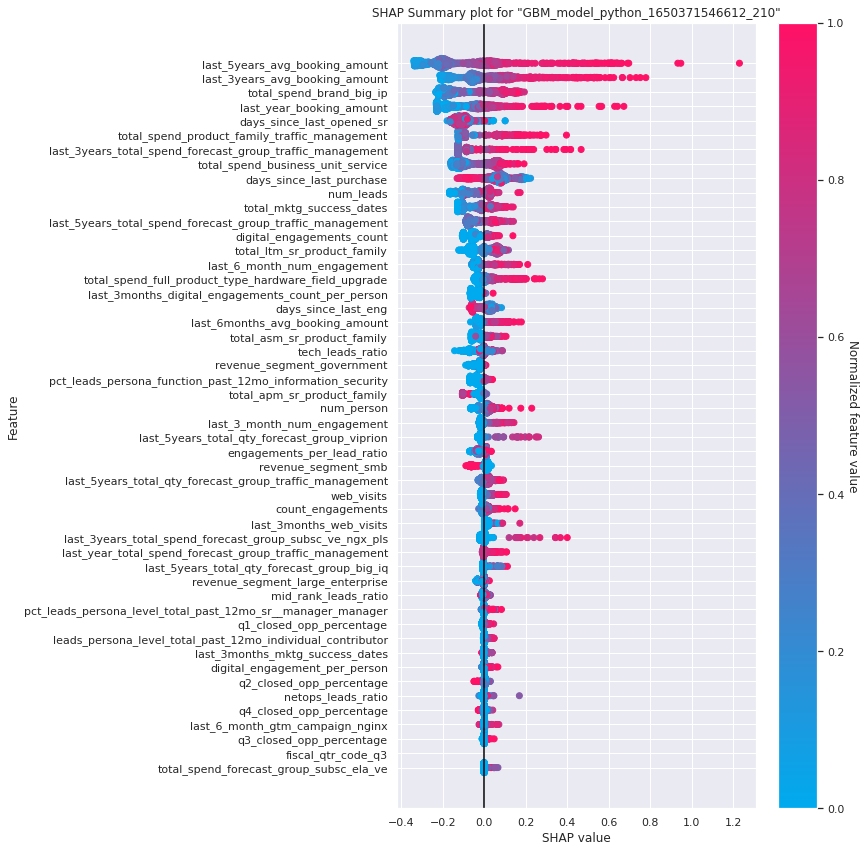

In [0]:
fig = saved_model.shap_summary_plot(x_score_h2o[features_only], top_n_features = 50)
shap_imp_ftrs_plot = '/dbfs/FileStore/seg_current_cust_shap_imp_ftrs_plot.png'
plt.savefig(shap_imp_ftrs_plot)


### Finalize tables

In [0]:
# rename and add final columns 
results_df_pd['acct_status_code'] = pop
results_df_pd['prediction_start_date'] = pd.to_datetime(results_df_pd['calendar_date'])
results_df_pd['prediction_end_date'] = results_df_pd['prediction_start_date'] + pd.DateOffset(years=1)
results_df_pd['next_year_piacv_prediction_amt'] = results_df_pd['rounded_predict_plus_constant_or_3yr_average']
results_df_pd = results_df_pd.rename(columns={'account_id':'sfdcf5_acct_id'})


#rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')

In [0]:
final_columns = ['prediction_start_date',
                'prediction_end_date', 
                'sfdcf5_acct_id',
                'account_name',
                'account_org_name',
                'acct_status_code',
                'predict',
                'predict_plus_constant',
                'rounded_predict',
                'rounded_predict_plus_constant',
                'next_year_piacv_prediction_amt',
                'next_year_growth_ind',
                'buying_group_code' ,
                'Features_Positively_Contributing_to_Model',
                'Features_Negatively_Contributing_to_Model' ] + features_only

In [0]:
# Remove marketplace and f5 accounts
acct_org_marketplace_mask = ~results_df_pd['account_org_name'].str.contains('Marketplace')
acct_name_marketplace_mask = ~results_df_pd['account_name'].str.contains('Marketplace')
acct_org_f5_mask = ~results_df_pd['account_org_name'].str.lower().str.contains('f5')
acct_name_f5_mask = ~results_df_pd['account_name'].str.lower().str.contains('f5')


results_df_pd = results_df_pd[acct_org_marketplace_mask&acct_name_marketplace_mask&acct_org_f5_mask&acct_name_f5_mask]
# results_df = spark.createDataFrame(results_df_pd[final_columns])


scored_file = '/dbfs/FileStore/seg_current_cust_scored_dataset.csv'
results_df_pd[final_columns].to_csv(scored_file, index=False)

In [0]:
# match acct ids to the ones that receive predictions
acct_lst = list(results_df_pd.sfdcf5_acct_id)
acct_msk = shap_df['account_id'].isin(acct_lst)
shap_df = shap_df[acct_msk]

# shap_df = spark.createDataFrame(shap_df_pd)

shap_file = '/dbfs/FileStore/seg_current_cust_shap_dataset.csv'
shap_df.to_csv(shap_file, index=False)

In [0]:
# create metrics dict based off of PREDICT+CONSTANT spend predictions
total_accts = results_df_pd['sfdcf5_acct_id'].count()
metrics_dict = {'score_total accounts' : total_accts
                , 'score_pct_growers' : results_df_pd['next_year_growth_ind'].sum() / total_accts
                , 'score_pct_spenders' : results_df_pd[results_df_pd['next_year_piacv_prediction_amt'] > 0]['sfdcf5_acct_id'].count() / total_accts
               }


# Download train day metrics artifacts
local_path = client.download_artifacts(run_id, artifacts_paths['train_day_metrics'], local_dir)
print("Artifacts downloaded in: {}".format(local_dir))
print("Artifacts: {}".format(os.listdir(local_dir)))
print()

full_train_dict = json.load(open(local_dir+'/'+artifacts_paths['train_day_metrics']))
dts = list(training_df_pd['calendar_date_str'].unique())
train_dict = {}
for d in dts:
  metrics_dict.update({str(d) +'_'+k:v for k, v in full_train_dict[str(d)].items() if 'ratio_growers' in k or 'total_accts' in k or 'ratio_spenders' in k})


metrics_dict

Artifacts downloaded in: /tmp/artifact_downloads/segmentation/current_customer
Artifacts: ['training_dataset.csv', 'metrics_per_train_day.json', 'features_only_list.txt']

Out[57]: {'score_total accounts': 28180,
 'score_pct_growers': 0.3411284599006387,
 'score_pct_spenders': 0.7117104329311569,
 '20200401_train_total_accts': 35008,
 '20200401_train_ratio_growers': 0.09874885740402194,
 '20200401_train_ratio_spenders': 0.16384826325411334}

### Log to MLFlow

In [0]:
%run /MDA/MODELING_DEV/segmentation/iteration3-2/ITERATION2_20202021_train/mlflow-logging-functions

In [0]:

model_name = os.path.basename(artifacts_paths['model_path'])

production_score_log(title = scoring_date + ' Production Current Customer Scores'
                     ,  original_dv = active_run['data']['tags']['original_dv']
                     , train_date = active_run['data']['tags']['train_date']
                     , score_date = str(results_df_pd.calendar_date.unique()).replace("[","").replace("]","").replace("'","")
#                      , model = saved_model
                     , model_path = model_name
                     , boxplot_graph = box_fig_file
                     , scored_data = scored_file
                     , raw_data = raw_data_file
                     , shap_data = shap_file
                     , max_prediction = results_df_pd.rounded_predict_plus_constant_or_3yr_average.max()
                     , constants_mapping = bin_avg_pct_errors_file
                     , account_population = pop
                     , kde_higher_spender_file = kde_mill_plus_file
                     , kde_lower_spender_file = kde_less_than_mill_file
                     , shap_imp_ftrs_plot = shap_imp_ftrs_plot 
                     , ftr_summary_file = ftr_summary_file
                     , predictions_summary_file = predict_summary_file
                     , metrics_dict = metrics_dict
                     , exp=score_exp_path)